In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
data=load_iris()

In [2]:
datanp=np.array(data.data)
datatar=np.array([data.target])

In [3]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
Datacompl=np.concatenate((datanp,datatar.T),axis=-1)

In [6]:
indSetosa=np.where(Datacompl[:,-1]==0)[0]
indVersicolor=np.where(Datacompl[:,-1]==1)[0]
indVirginica=np.where(Datacompl[:,-1]==2)[0]

In [7]:
DataSetosa=Datacompl[indSetosa]

In [8]:
DataVersicolor=Datacompl[indVersicolor]
DataVersicolor[:,4]=-1
target=np.concatenate((DataSetosa[:,4],DataVersicolor[:,4]))
target[target==0]=1

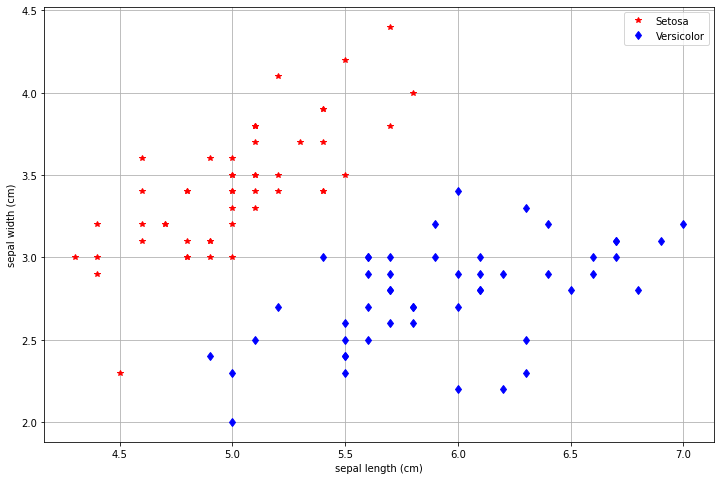

In [9]:
plt.figure(figsize=(12,8))
plt.plot(DataSetosa[:,0],DataSetosa[:,1],'r*',label='Setosa')
plt.plot(DataVersicolor[:,0],DataVersicolor[:,1],'bd',label='Versicolor')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()
plt.grid()
plt.show()

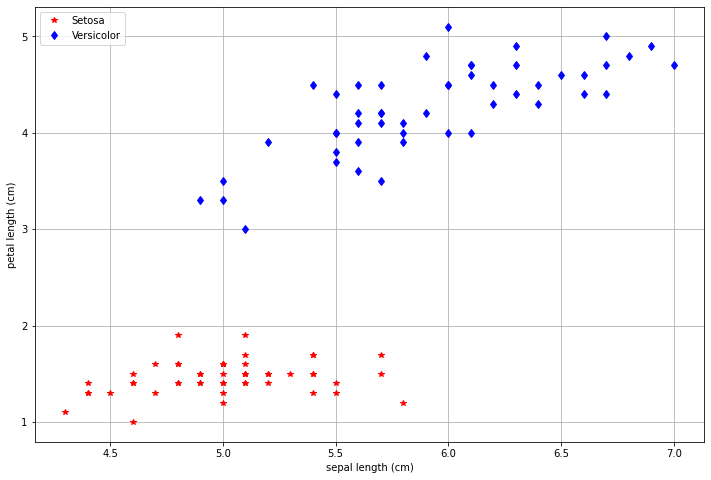

In [10]:
plt.figure(figsize=(12,8))
plt.plot(DataSetosa[:,0],DataSetosa[:,2],'r*',label='Setosa')
plt.plot(DataVersicolor[:,0],DataVersicolor[:,2],'bd',label='Versicolor')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.legend()
plt.grid()
plt.show()

In [11]:
#We are going to use the petal length and sepal length as features

In [12]:
Features=np.concatenate((DataSetosa[:,(0,2)],DataVersicolor[:,(0,2)]))

In [13]:
FeaturesBias=np.concatenate((np.ones((Features.shape[0],1)),Features),axis=-1)

In [14]:
def Perceptron(eta,epochs,Feat,Tar):
  rs=1
  reg=np.random.RandomState(rs)
  W=reg.normal(loc=0.0,scale=0.01,size=1 +(Feat.shape[1]-1))
  for i in range(1,epochs+1):
    pred=np.matmul(Feat,W)
    pred=np.where(pred>=0,1,-1)
    W=W+eta*(np.matmul((Tar-pred.T),Feat).T)
  return W
  

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(FeaturesBias, target, test_size=0.33, random_state=42)
we=Perceptron(0.001,12,X_train,y_train)

In [16]:
from sklearn.linear_model import Perceptron

In [17]:
# Create a perceptron object with the parameters: 60 iterations (epochs) over the data, and a learning rate of 0.15
ppn = Perceptron(max_iter=60, eta0=0.15, random_state=0)

In [18]:
target

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1.])

In [19]:
# Train the perceptron
ppn.fit(FeaturesBias, target)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.15,
           fit_intercept=True, max_iter=60, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [20]:
ppn.coef_

array([[ 0.3  ,  0.75 , -1.635]])

In [21]:
#eta=0.1, n_iter=10, rs=1;
def Per(eta,n_iter,X,y):
  rs=1
  reg=np.random.RandomState(rs)
  w=reg.normal(loc=0.0,scale=0.01,size=1 +(X.shape[1]-1))
  return w

In [22]:
Per(0.1,10,X_train,y_train)

array([ 0.01624345, -0.00611756, -0.00528172])

In [23]:
we

array([ 0.10824345,  0.24488244, -0.45748172])

In [25]:
premi=np.where(np.matmul(X_test,we)>=0,1,-1)

In [26]:
premi-y_test

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])